# Train First Model

In [1]:
import warnings

import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2
from feature_engineering import *
from model_experimentation import *

warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [4]:
granularity = 'hour'

df = pd.read_parquet(f"./../../data/model_train/2022_05_16_wind_dataset_lags_central_tendency_dispersion_{granularity}.gzip")

In [20]:
def drop_null_features_and_instances(df,null_percentage=0.2):
    '''Drop features and instances that are above a null percentage.'''

    dataset_size = df.shape[0]
    feature_size = df.shape[1]
    nulls = df.isnull().sum() / dataset_size
    nulls_20_percent = nulls[nulls > null_percentage]
    cols_nulls_20_percent = nulls_20_percent.index.tolist()
    non_null_tresh = np.round(df.drop(columns=cols_nulls_20_percent).shape[1])
    df_selected = df.drop(columns=cols_nulls_20_percent)

    # df_selected = df_selected.dropna(axis=0,thresh=non_null_tresh)
    return df_selected
# dataset_size = df.shape[0]
# feature_size = df.shape[1]
# nulls = df.isnull().sum() / dataset_size
# nulls_20_percent = nulls[nulls > 0.20]
# cols_nulls_20_percent = nulls_20_percent.index.tolist()
# non_null_tresh = np.round(df.drop(columns=cols_nulls_20_percent).shape[1])
# non_null_tresh
# nulls_20_percent

df_selected = drop_null_features_and_instances(df,null_percentage=0.2)

In [24]:
df_selected.dropna(axis=0,thresh=non_null_tresh).shape

(140788, 379)

In [ ]:
df_selected.dropna(axis=0,thresh=non_null_tresh)

In [14]:
df_selected = df.drop(columns=cols_nulls_20_percent).dropna(axis=0,thresh=non_null_tresh)
df_selected.shape

(140788, 379)

In [9]:

# TODO: Remove first 24 hours of test.
# def remove_first_hours(df,max_hour=0):
#     '''Remove the first hours in order to avoid data leakage.'''
#     first_day = 
#     df.DATETIME.dt.year.min()
#     df.DATETIME.dt.month.min()
#     df.DATETIME.dt.day.min()

## Experimenting Linear Regression to predict next hour of wind direction and wind speed

train: 2018

validation: 2019

test: 2020

In [12]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge


In [11]:
# TODO: Remove last values of target from train and validation to avoid small data leakage.

Target distribution [mean(std)]:  2.64 (1.56)
Prediction distribution [mean(std)]:  2.64 (1.37)
MAE 0.53
RMSE 0.73



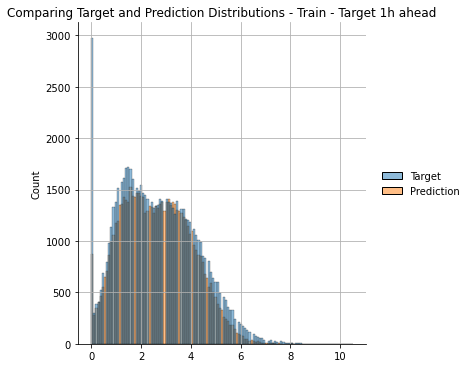

Target distribution [mean(std)]:  2.38 (1.67)
Prediction distribution [mean(std)]:  2.42 (1.47)
MAE 0.56
RMSE 0.79



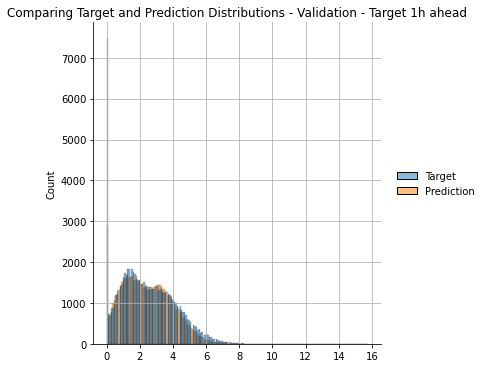

In [13]:
datasets = setup_datasets_for_experiment(df_selected,test_year=2020,validation_year=2019,target_format='1h',target_name='WIND_SPEED_ms',targets_to_drop=[])
X_train_norm,y_train,X_validation_norm,y_validation,X_test_norm,y_test = datasets

model = LinearRegression(n_jobs=-1)
model.fit(X_train_norm,y_train)

max = y_train.values.max()
min = 0

evaluate_predictions(y_pred=model.predict(X_train_norm).ravel(),y_true=y_train,max_prediction=max,min_prediction=min,set='Train - Target 1h ahead')
evaluate_predictions(y_pred=model.predict(X_validation_norm).ravel(),y_true=y_validation,max_prediction=max,min_prediction=min,set='Validation - Target 1h ahead')

Target distribution [mean(std)]:  2.64 (1.56)
Prediction distribution [mean(std)]:  2.64 (1.30)
MAE 0.63
RMSE 0.85



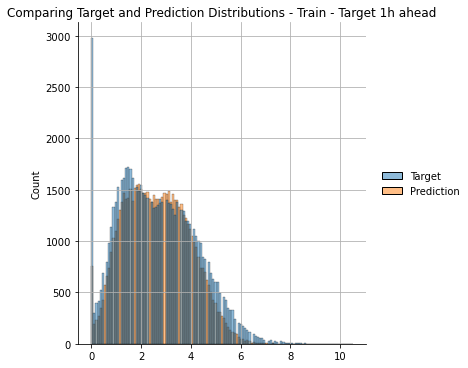

Target distribution [mean(std)]:  2.37 (1.67)
Prediction distribution [mean(std)]:  2.43 (1.39)
MAE 0.67
RMSE 0.92



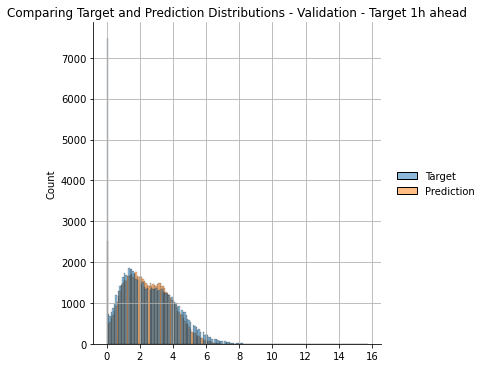

In [14]:
datasets = setup_datasets_for_experiment(df_selected,test_year=2020,validation_year=2019,target_format='3h',target_name='WIND_SPEED_ms',targets_to_drop=[])
X_train_norm,y_train,X_validation_norm,y_validation,X_test_norm,y_test = datasets

model = LinearRegression(n_jobs=-1)
model.fit(X_train_norm,y_train)

max = y_train.values.max()
min = 0

evaluate_predictions(y_pred=model.predict(X_train_norm).ravel(),y_true=y_train,max_prediction=max,min_prediction=min,set='Train - Target 1h ahead')
evaluate_predictions(y_pred=model.predict(X_validation_norm).ravel(),y_true=y_validation,max_prediction=max,min_prediction=min,set='Validation - Target 1h ahead')

Target distribution [mean(std)]:  2.63 (1.56)
Prediction distribution [mean(std)]:  2.63 (1.23)
MAE 0.74
RMSE 0.97



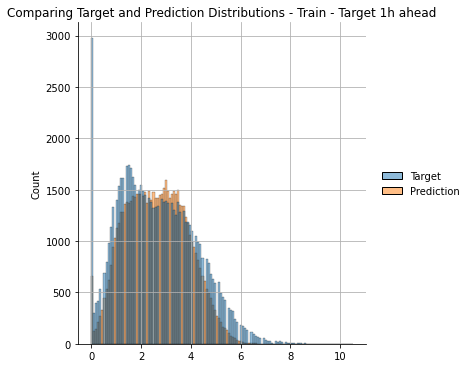

Target distribution [mean(std)]:  2.37 (1.67)
Prediction distribution [mean(std)]:  2.45 (1.31)
MAE 0.78
RMSE 1.05



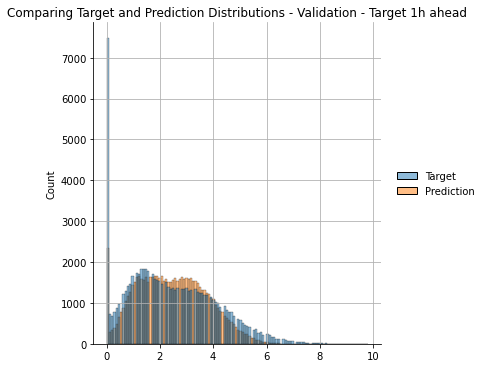

In [15]:
datasets = setup_datasets_for_experiment(df_selected,test_year=2020,validation_year=2019,target_format='6h',target_name='WIND_SPEED_ms',targets_to_drop=[])
X_train_norm,y_train,X_validation_norm,y_validation,X_test_norm,y_test = datasets

model = LinearRegression(n_jobs=-1)
model.fit(X_train_norm,y_train)

max = y_train.values.max()
min = 0

evaluate_predictions(y_pred=model.predict(X_train_norm).ravel(),y_true=y_train,max_prediction=max,min_prediction=min,set='Train - Target 1h ahead')
evaluate_predictions(y_pred=model.predict(X_validation_norm).ravel(),y_true=y_validation,max_prediction=max,min_prediction=min,set='Validation - Target 1h ahead')

## Ridge Regression

Target distribution [mean(std)]:  2.64 (1.56)
Prediction distribution [mean(std)]:  2.65 (1.37)
MAE 0.53
RMSE 0.73



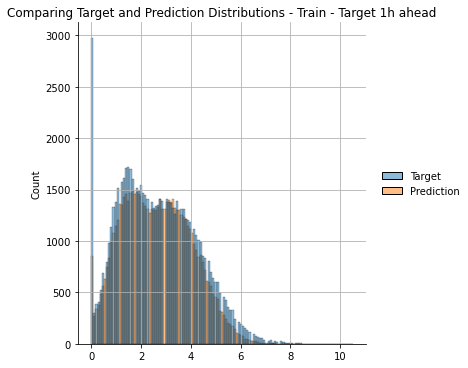

Target distribution [mean(std)]:  2.38 (1.67)
Prediction distribution [mean(std)]:  2.42 (1.46)
MAE 0.56
RMSE 0.79



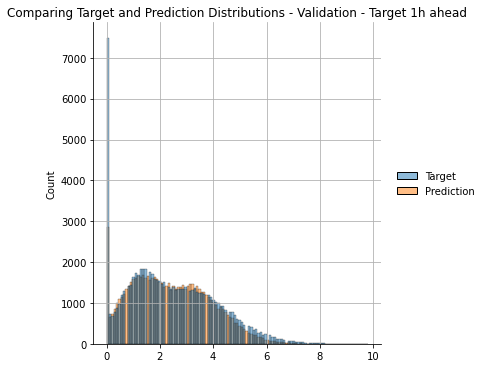

In [13]:
datasets = setup_datasets_for_experiment(df_selected,test_year=2020,validation_year=2019,target_format='1h',target_name='WIND_SPEED_ms',targets_to_drop=[])
X_train_norm,y_train,X_validation_norm,y_validation,X_test_norm,y_test = datasets

model = Ridge()
model.fit(X_train_norm,y_train)

max = y_train.values.max()
min = 0

evaluate_predictions(y_pred=model.predict(X_train_norm).ravel(),y_true=y_train,max_prediction=max,min_prediction=min,set='Train - Target 1h ahead')
evaluate_predictions(y_pred=model.predict(X_validation_norm).ravel(),y_true=y_validation,max_prediction=max,min_prediction=min,set='Validation - Target 1h ahead')

Target distribution [mean(std)]:  2.64 (1.56)
Prediction distribution [mean(std)]:  2.64 (1.29)
MAE 0.64
RMSE 0.85



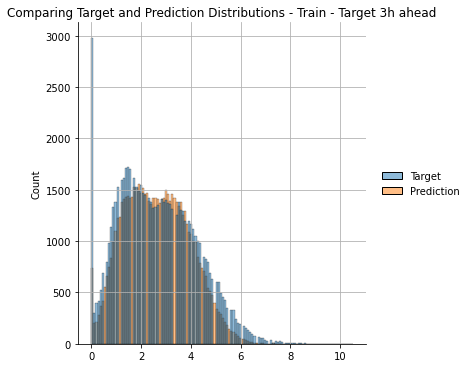

Target distribution [mean(std)]:  2.37 (1.67)
Prediction distribution [mean(std)]:  2.43 (1.38)
MAE 0.67
RMSE 0.92



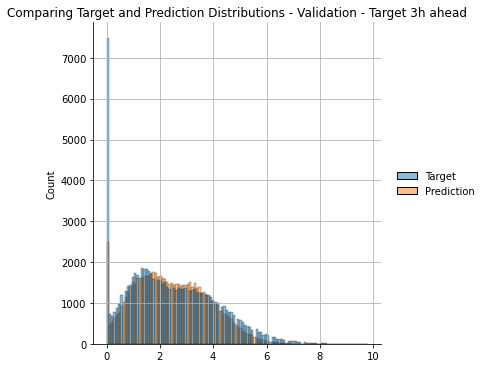

In [14]:
datasets = setup_datasets_for_experiment(df_selected,test_year=2020,validation_year=2019,target_format='3h',target_name='WIND_SPEED_ms',targets_to_drop=[])
X_train_norm,y_train,X_validation_norm,y_validation,X_test_norm,y_test = datasets

model = Ridge()
model.fit(X_train_norm,y_train)

max = y_train.values.max()
min = 0

evaluate_predictions(y_pred=model.predict(X_train_norm).ravel(),y_true=y_train,max_prediction=max,min_prediction=min,set='Train - Target 3h ahead')
evaluate_predictions(y_pred=model.predict(X_validation_norm).ravel(),y_true=y_validation,max_prediction=max,min_prediction=min,set='Validation - Target 3h ahead')

Target distribution [mean(std)]:  2.63 (1.56)
Prediction distribution [mean(std)]:  2.63 (1.22)
MAE 0.73
RMSE 0.96



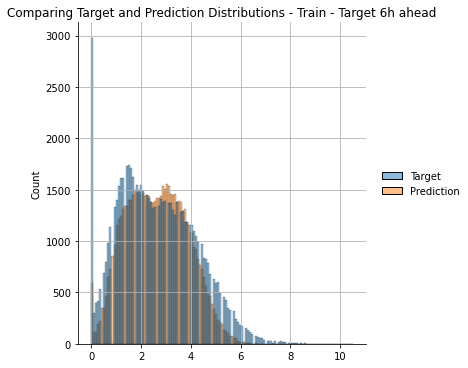

Target distribution [mean(std)]:  2.37 (1.67)
Prediction distribution [mean(std)]:  2.47 (1.30)
MAE 0.77
RMSE 1.04



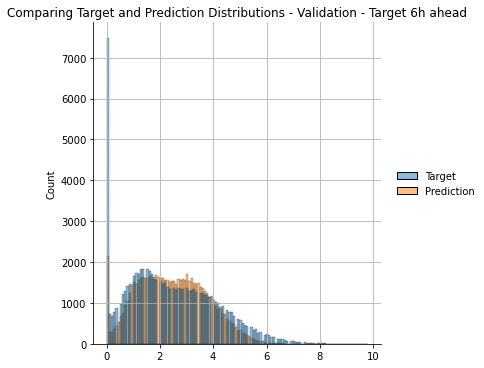

In [15]:
datasets = setup_datasets_for_experiment(df_selected,test_year=2020,validation_year=2019,target_format='6h',target_name='WIND_SPEED_ms',targets_to_drop=[])
X_train_norm,y_train,X_validation_norm,y_validation,X_test_norm,y_test = datasets

model = Ridge()
model.fit(X_train_norm,y_train)

max = y_train.values.max()
min = 0

evaluate_predictions(y_pred=model.predict(X_train_norm).ravel(),y_true=y_train,max_prediction=max,min_prediction=min,set='Train - Target 6h ahead')
evaluate_predictions(y_pred=model.predict(X_validation_norm).ravel(),y_true=y_validation,max_prediction=max,min_prediction=min,set='Validation - Target 6h ahead')

# Lasso Regression

Target distribution [mean(std)]:  2.64 (1.56)
Prediction distribution [mean(std)]:  2.64 (0.98)
MAE 0.69
RMSE 0.89



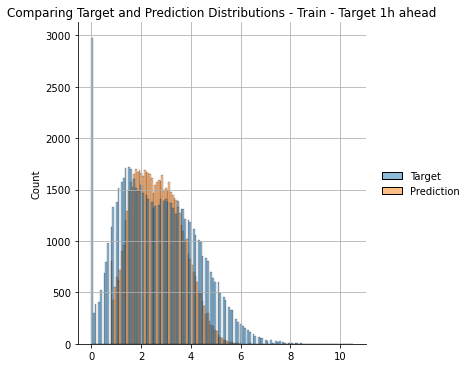

Target distribution [mean(std)]:  2.38 (1.67)
Prediction distribution [mean(std)]:  2.47 (1.05)
MAE 0.75
RMSE 0.95



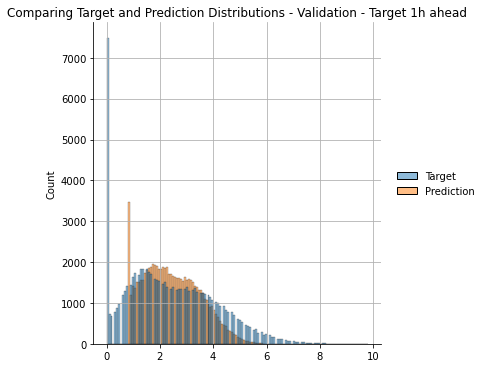

In [23]:
datasets = setup_datasets_for_experiment(df_selected,test_year=2020,validation_year=2019,target_format='1h',target_name='WIND_SPEED_ms',targets_to_drop=[])
X_train_norm,y_train,X_validation_norm,y_validation,X_test_norm,y_test = datasets

model = Lasso(alpha=0.05,max_iter=1000)
model.fit(X_train_norm,y_train)

max = y_train.values.max()
min = 0

evaluate_predictions(y_pred=model.predict(X_train_norm).ravel(),y_true=y_train,max_prediction=max,min_prediction=min,set='Train - Target 1h ahead')
evaluate_predictions(y_pred=model.predict(X_validation_norm).ravel(),y_true=y_validation,max_prediction=max,min_prediction=min,set='Validation - Target 1h ahead')

Target distribution [mean(std)]:  2.64 (1.56)
Prediction distribution [mean(std)]:  2.64 (0.85)
MAE 0.81
RMSE 1.02



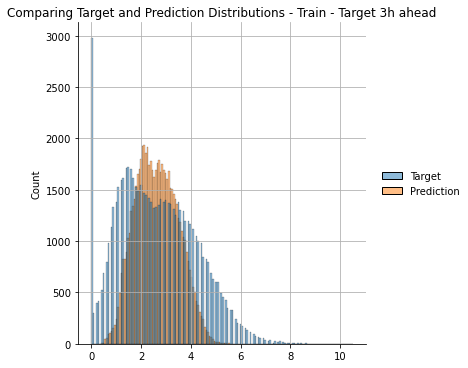

Target distribution [mean(std)]:  2.37 (1.67)
Prediction distribution [mean(std)]:  2.46 (0.91)
MAE 0.87
RMSE 1.10



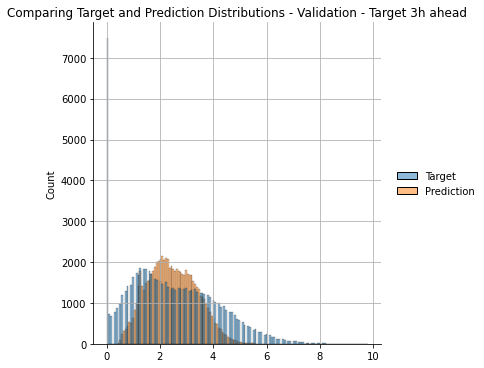

In [24]:
datasets = setup_datasets_for_experiment(df_selected,test_year=2020,validation_year=2019,target_format='3h',target_name='WIND_SPEED_ms',targets_to_drop=[])
X_train_norm,y_train,X_validation_norm,y_validation,X_test_norm,y_test = datasets

model = Lasso(alpha=0.05,max_iter=1000)
model.fit(X_train_norm,y_train)

max = y_train.values.max()
min = 0

evaluate_predictions(y_pred=model.predict(X_train_norm).ravel(),y_true=y_train,max_prediction=max,min_prediction=min,set='Train - Target 3h ahead')
evaluate_predictions(y_pred=model.predict(X_validation_norm).ravel(),y_true=y_validation,max_prediction=max,min_prediction=min,set='Validation - Target 3h ahead')

Target distribution [mean(std)]:  2.63 (1.56)
Prediction distribution [mean(std)]:  2.63 (0.67)
MAE 0.97
RMSE 1.21



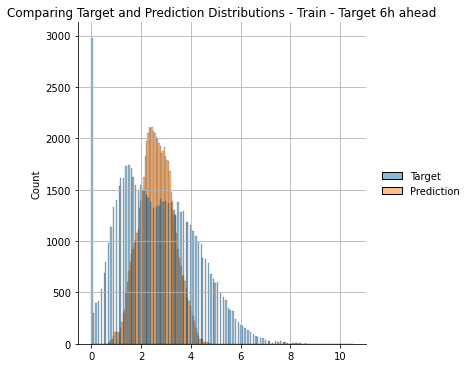

Target distribution [mean(std)]:  2.37 (1.67)
Prediction distribution [mean(std)]:  2.48 (0.71)
MAE 1.05
RMSE 1.30



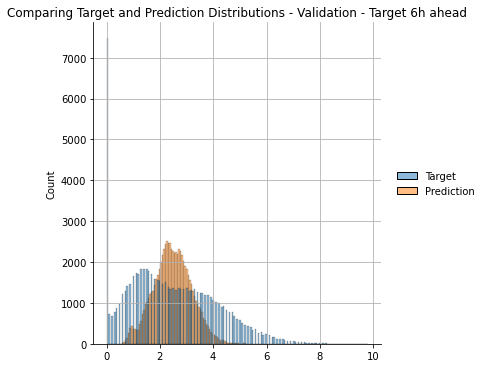

In [25]:
datasets = setup_datasets_for_experiment(df_selected,test_year=2020,validation_year=2019,target_format='6h',target_name='WIND_SPEED_ms',targets_to_drop=[])
X_train_norm,y_train,X_validation_norm,y_validation,X_test_norm,y_test = datasets

model = Lasso(alpha=0.05,max_iter=1000)
model.fit(X_train_norm,y_train)

max = y_train.values.max()
min = 0

evaluate_predictions(y_pred=model.predict(X_train_norm).ravel(),y_true=y_train,max_prediction=max,min_prediction=min,set='Train - Target 6h ahead')
evaluate_predictions(y_pred=model.predict(X_validation_norm).ravel(),y_true=y_validation,max_prediction=max,min_prediction=min,set='Validation - Target 6h ahead')

In [ ]:
# from ngboost import NGBRegressor
# from ngboost.distns import Normal

# ngb = NGBRegressor(Dist=Normal).fit(X_train, y_train)
# Y_preds = ngb.predict(X_validation)
# Y_dists = ngb.pred_dist(X_validation)

# test_MSE = mean_squared_error(Y_preds, y_validation)
# print("Validation MSE", test_MSE)

# test_NLL = -Y_dists.logpdf(y_validation.flatten()).mean()
# print("Validation NLL", test_NLL)